In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
dataset=pd.read_csv("Mall_Customers.csv")

In [7]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
X=dataset.iloc[:,[3,4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
# preprocessing the data using standard scaler and nomalization
from sklearn.preprocessing import StandardScaler,normalize
Sc=StandardScaler()
X_std=Sc.fit_transform(X)
X_std

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [10]:
X_normalized=normalize(X_std)
X_normalized

array([[-0.97013572, -0.24256276],
       [-0.82401048,  0.56657455],
       [-0.7039784 , -0.71022139],
       [-0.85305371,  0.52182312],
       [-0.97279192, -0.23168055],
       [-0.85658242,  0.51601024],
       [-0.68749685, -0.72618736],
       [-0.69078646,  0.72305883],
       [-0.65452065, -0.75604412],
       [-0.88229014,  0.47070597],
       [-0.74851489, -0.66311798],
       [-0.64199257,  0.76671086],
       [-0.74971714, -0.66175843],
       [-0.82998676,  0.55778309],
       [-0.73123898, -0.68212137],
       [-0.81069137,  0.58547374],
       [-0.93140492, -0.36398472],
       [-0.92647723,  0.37635083],
       [-0.86725326, -0.49786723],
       [-0.61137179,  0.7913435 ],
       [-0.92103954, -0.38946909],
       [-0.84445476,  0.53562689],
       [-0.61183513, -0.79098532],
       [-0.83762959,  0.54623866],
       [-0.66245749, -0.74909951],
       [-0.70946363,  0.70474205],
       [-0.86933095, -0.49423041],
       [-0.94753177,  0.3196616 ],
       [-0.85037495,

In [11]:
X_normalized = pd.DataFrame(X_normalized)


In [12]:
X_normalized.columns = X.columns

In [13]:
X_normalized

,Annual Income (k$),Spending Score (1-100)
0,-0.970136,-0.242563
1,-0.824010,0.566575
2,-0.703978,-0.710221
3,-0.853054,0.521823
4,-0.972792,-0.231681
...,...,...
195,0.896995,0.442040
196,0.945312,-0.326169
197,0.937891,0.346931
198,0.919188,-0.393819


In [55]:
# model creation for clustering
from sklearn.cluster import OPTICS,cluster_optics_dbscan
optics=OPTICS(min_samples=20,xi=0.05,min_cluster_size=5).fit(X_normalized)

In [56]:
labels=optics.labels_
labels

array([ 0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  1,  0,  0,  0,  0,
        1,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  1,  0,  0,
        1,  0,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  0,  1,  0,  0,  1,
        0,  1,  1, -1,  0,  1, -1,  0, -1, -1, -1, -1,  0,  2,  2,  2,  2,
        3,  3,  3,  2,  2,  2,  2,  2,  3,  3,  2,  2,  2,  2,  2,  3,  2,
        3,  3,  2,  3,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3])

In [89]:
# Producing the labels according to the DBSCAN technique with eps = 0.5
labels1 = cluster_optics_dbscan(reachability = optics.reachability_,
                                   core_distances = optics.core_distances_,
                                   ordering = optics.ordering_, eps = 0.5)

# Producing the labels according to the DBSCAN technique with eps = 0.7
labels2 = cluster_optics_dbscan(reachability = optics.reachability_,
                                   core_distances = optics.core_distances_,
                                   ordering = optics.ordering_, eps = 1)


In [101]:
# Creating a numpy array with numbers at equal spaces till
# the specified range
space = np.arange(len(X_normalized))

# Storing the reachability distance of each point
reachability = optics.reachability_[optics.ordering_]

# Storing the cluster labels of each point
labels = optics.labels_[optics.ordering_]

print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3]


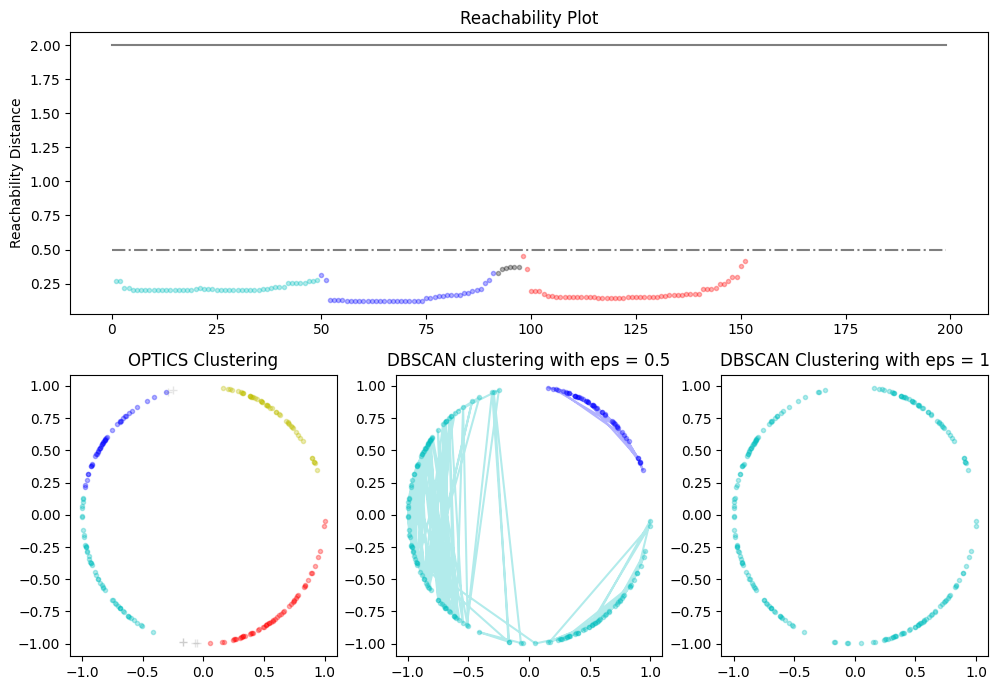

In [104]:
# Defining the framework of the visualization
from matplotlib import gridspec
plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Plotting the OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = X_normalized[optics.labels_ == Class]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
    
ax2.plot(X_normalized.iloc[optics.labels_ == -1, 0],
        X_normalized.iloc[optics.labels_ == -1, 1],
       'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering')


# Plotting the Reachability-Distance Plot
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 3), colors):
    Xk = space[labels == Class]
    Rk = reachability[labels == Class]
    ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')

# Plotting the DBSCAN Clustering with eps = 0.5
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
    Xk = X_normalized[labels1 == Class]
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.')
      
ax3.plot(X_normalized.iloc[labels1 == -1, 0],
        X_normalized.iloc[labels1 == -1, 1],
       'k+', alpha = 0.1)
ax3.set_title('DBSCAN clustering with eps = 0.5')


# Plotting the DBSCAN Clustering with eps = 2.0

colors = ['c.', 'y.', 'm.', 'g.']
for Class, colour in zip(range(0, 4), colors):
    Xk = X_normalized.iloc[labels2 == Class]
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
        
ax4.plot(X_normalized.iloc[labels2 == -1, 0],
        X_normalized.iloc[labels2 == -1, 1],
       'k+', alpha = 0.1)
ax4.set_title('DBSCAN Clustering with eps = 1')
plt.tight_layout()
plt.show()

